# Author - Sonali Bansode

# TASK 1 - Prediction using Supervised ML (Level-Beginner)

To Predict the percentage of marks of the students based on the number of hours they studied

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading data
data = pd.read_csv("C:\\Users\\sonali\\Desktop\\student_scores.csv")
print("Data imported successfully")

Data imported successfully


In [17]:
data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [4]:
# check if there is any null value in Dataset or not
data.isnull == True

False

We get false value that means there is no null value in our dataset. now we can visualize our data.

## Exploratory Data Analysis 

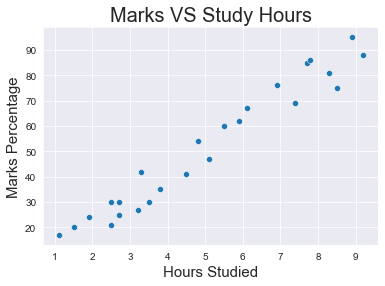

In [5]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'],x= data['Hours'])
plt.title('Marks VS Study Hours', size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

From above scatter plot we get the correlation between 'Marks Percentage' and 'Hours Studied', Now, we can plot a Regression Line to confirm the realtion.

## Plotting Regression Line

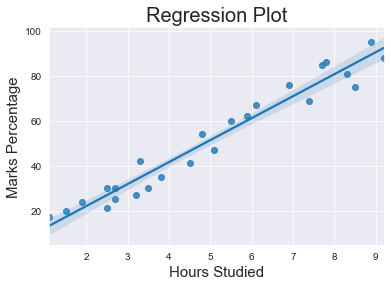

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot', size= 20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()
print(data.corr())

They are positively correlated.

## Prepared for Data

In [7]:
# Defining the X and Y from the data
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

## Splitting the Data

In [8]:
# Splitting the data in two
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 0)

## Training the Model

Fitting the Data into the model

In [9]:
regression = LinearRegression()
regression.fit(train_X, train_Y)
print("...........Model Trained.............")

...........Model Trained.............


## Predicting the Percentage of Marks

In [10]:
pred_Y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours':[i[0] for i in val_X], 'Predicted Marks': [k for k in pred_Y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the Predicted marks and Actual marks

In [11]:
compare_scores = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': pred_Y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Plotting Predicted Marks and Actual Marks

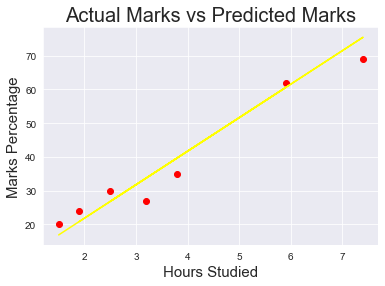

In [12]:
plt.scatter(x= val_X, y= val_Y, color = 'red')
plt.plot(val_X, pred_Y, color = 'yellow')
plt.title('Actual Marks vs Predicted Marks', size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()


## Evaluating the Model

In [13]:
# Calculating the accuracy of the model
print('Mean Absolute Error:', mean_absolute_error(val_X , pred_Y))

Mean Absolute Error: 35.399628895235665


## What will be the the predicted score of a student if he/she studies for 9.25 hrs/day ?
 

In [14]:
hours = [9.25]
answer = regression.predict([hours])
print("Scores = {}". format(round(answer[0],7)))

Scores = 93.8927289


# ................END...............